# Assignment 2 - Project 13 - Customer Clustering
## Simone Tarenzi, Saad Raza Hussain Shafi

# Importing the data

In [508]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

customers = pd.read_csv('Customers.csv')

In [509]:
customers

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [510]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [511]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0


# Data Description

https://www.kaggle.com/datasets/datascientistanna/customers-dataset

This dataset is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

The dataset has 2000 records and 8 features:

* Customer ID: goes from 1 to 2000
* Gender: male or female
* Age: expressed in years
* Annual Income: expressed in dollars
* Spending Score: score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience: expressed in years
* Family Size: number of people in the household family unit

## Gender

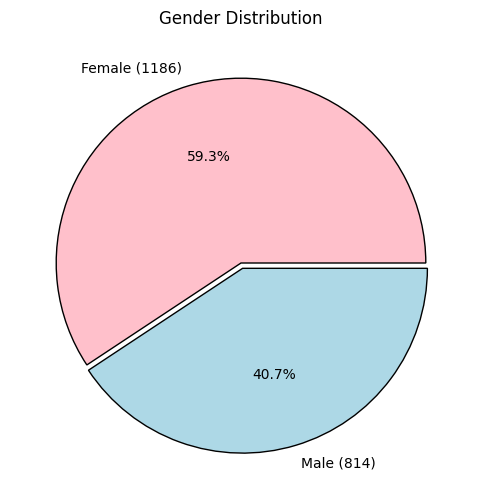

In [512]:
# pie chart of gender distribution
gender_counts = customers['Gender'].value_counts()

labels = [f'{label} ({count})' for label, count in gender_counts.items()]
explode = (0, 0.03)

plt.figure(figsize=(10,6))
plt.pie(gender_counts, explode=explode, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'], wedgeprops=dict(edgecolor='black'))
plt.title('Gender Distribution')
plt.show()

## Age

Min Age: 0 years
Max Age: 99 years
Standard Deviation: 28.43
Average Age: 48.96
Average Male Age: 49.16
Average Female Age: 48.82


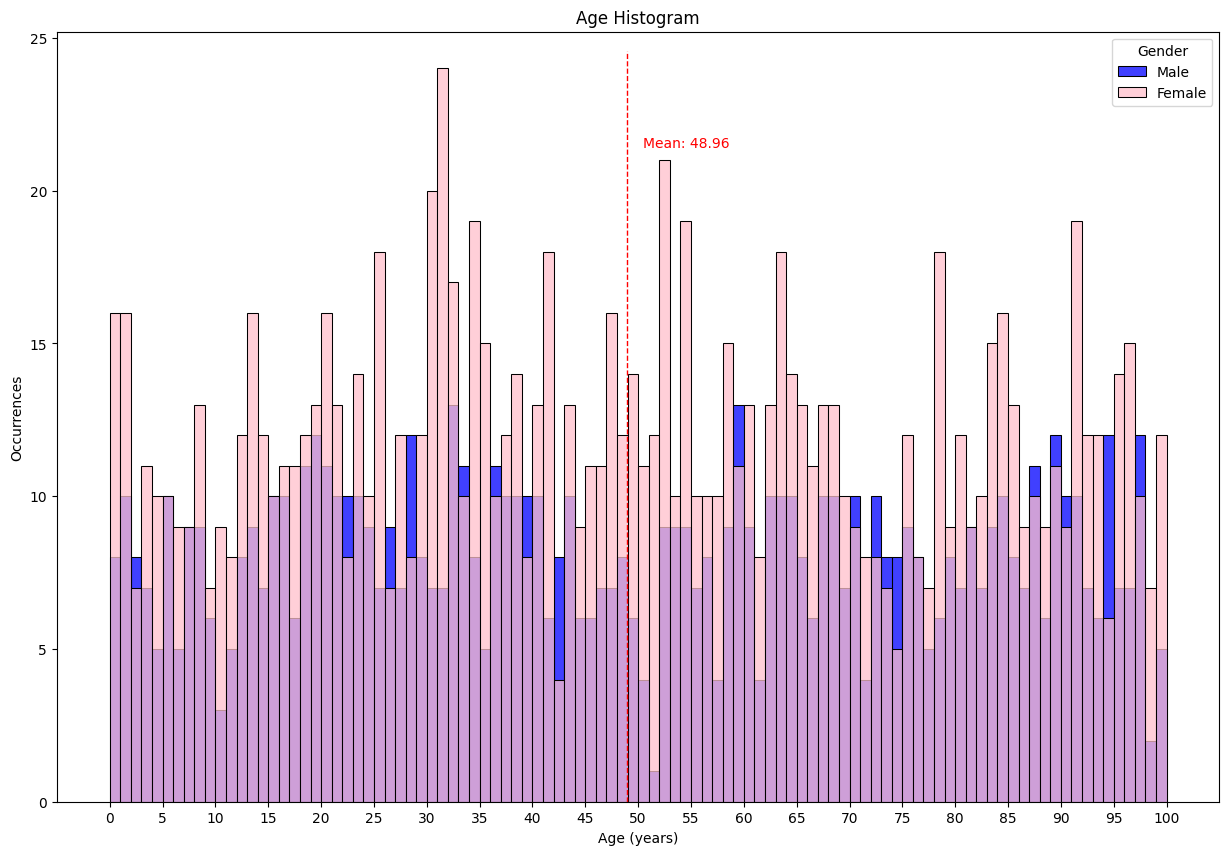

In [513]:
# get minimum and maximum age
min_age = customers['Age'].min()
max_age = customers['Age'].max()

print('Min Age: {:.0f} years'.format(min_age))
print('Max Age: {:.0f} years'.format(max_age))

# calculate average age
average_age = customers['Age'].mean()

# calculate standard deviation
std_age = customers['Age'].std()
print('Standard Deviation: {:.2f}'.format(std_age))

# separate age by gender
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

# calculate average age by gender
average_male_age = male_customers['Age'].mean()
average_female_age = female_customers['Age'].mean()

print('Average Age: {:.2f}'.format(average_age))
print('Average Male Age: {:.2f}'.format(average_male_age))
print('Average Female Age: {:.2f}'.format(average_female_age))

# histograms
plt.figure(figsize=(15,10))
sns.histplot(male_customers['Age'], bins=range(0, max_age + 2), color='blue', label='Male')
sns.histplot(female_customers['Age'], bins=range(0, max_age + 2), color='pink', label='Female')
plt.xticks(np.arange(min_age, max_age + 2, 5))

# add average lines
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
# plt.axvline(average_male_age, color='blue', linestyle='dashed', linewidth=1, ymax=0.975)
# plt.axvline(average_female_age, color='pink', linestyle='dashed', linewidth=1, ymax=0.975)

# add text near the lines
plt.text(average_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_age), color='red')
# plt.text(average_male_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_male_age), color='blue')
# plt.text(average_female_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_female_age), color='pink')

plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Occurrences')
plt.legend(title='Gender')
plt.show()

## Annual Income

Min Annual Income: $0
Max Annual Income: $189974
Standard Deviation: $45739.54


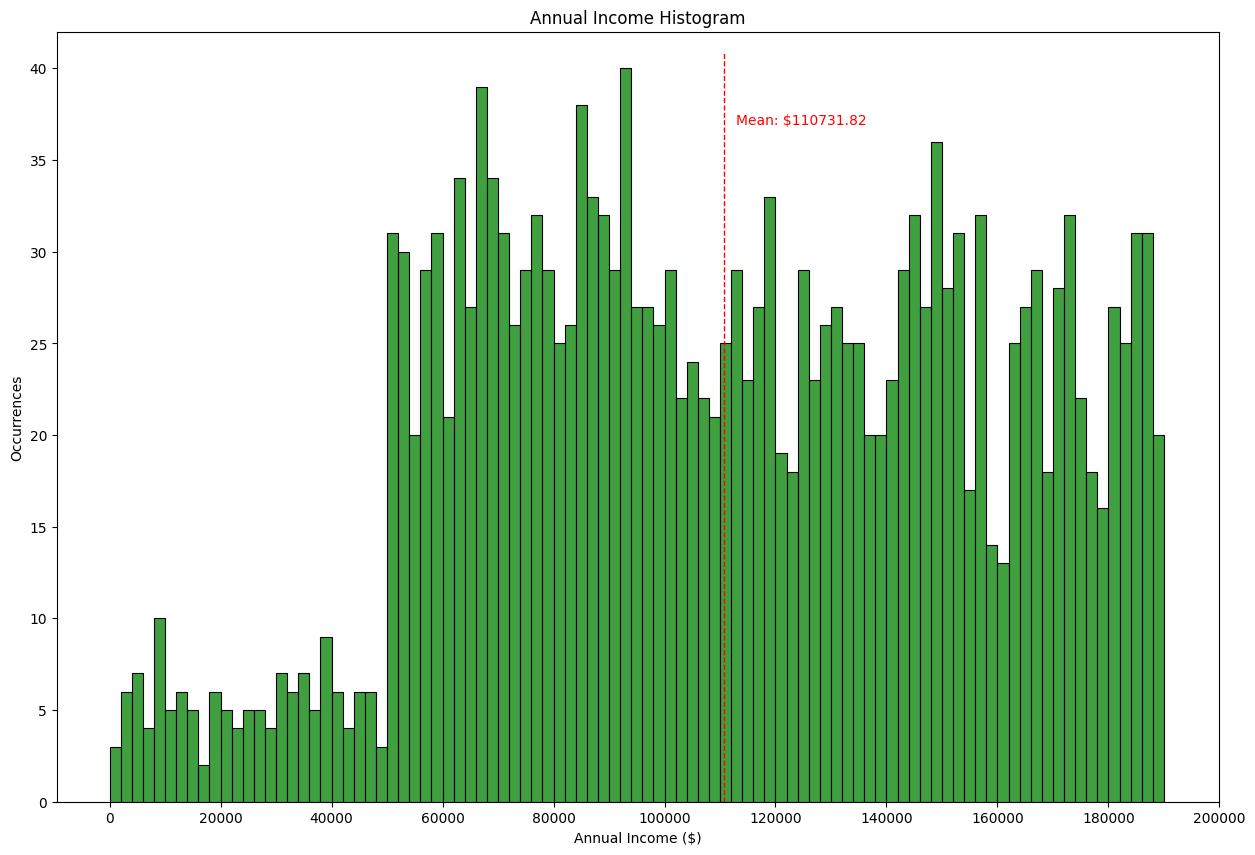

In [514]:
# get minimum and maximum annual income
min_income = customers['Annual Income ($)'].min()
max_income = customers['Annual Income ($)'].max()

print('Min Annual Income: ${:.0f}'.format(min_income))
print('Max Annual Income: ${:.0f}'.format(max_income))

# calculate average annual income
average_income = customers['Annual Income ($)'].mean()

# calculate standard deviation
std_income = customers['Annual Income ($)'].std()
print('Standard Deviation: ${:.2f}'.format(std_income))

# histogram
plt.figure(figsize=(15,10))
sns.histplot(customers['Annual Income ($)'], bins=range(0, max_income + 2000, 2000), color='green')
plt.xticks(np.arange(min_income, max_income + 20000, 20000))
plt.axvline(average_income, color='red', linestyle='dashed', linewidth=1, ymax=0.975)

# add text near the lines
plt.text(average_income * 1.02, plt.ylim()[1] * 0.88, 'Mean: ${:.2f}'.format(average_income), color='red')

plt.title('Annual Income Histogram')
plt.xlabel('Annual Income ($)')
plt.ylabel('Occurrences')
plt.show()

## Spending Score

Min Spending Score: 0
Max Spending Score: 100
Standard Deviation: 27.93


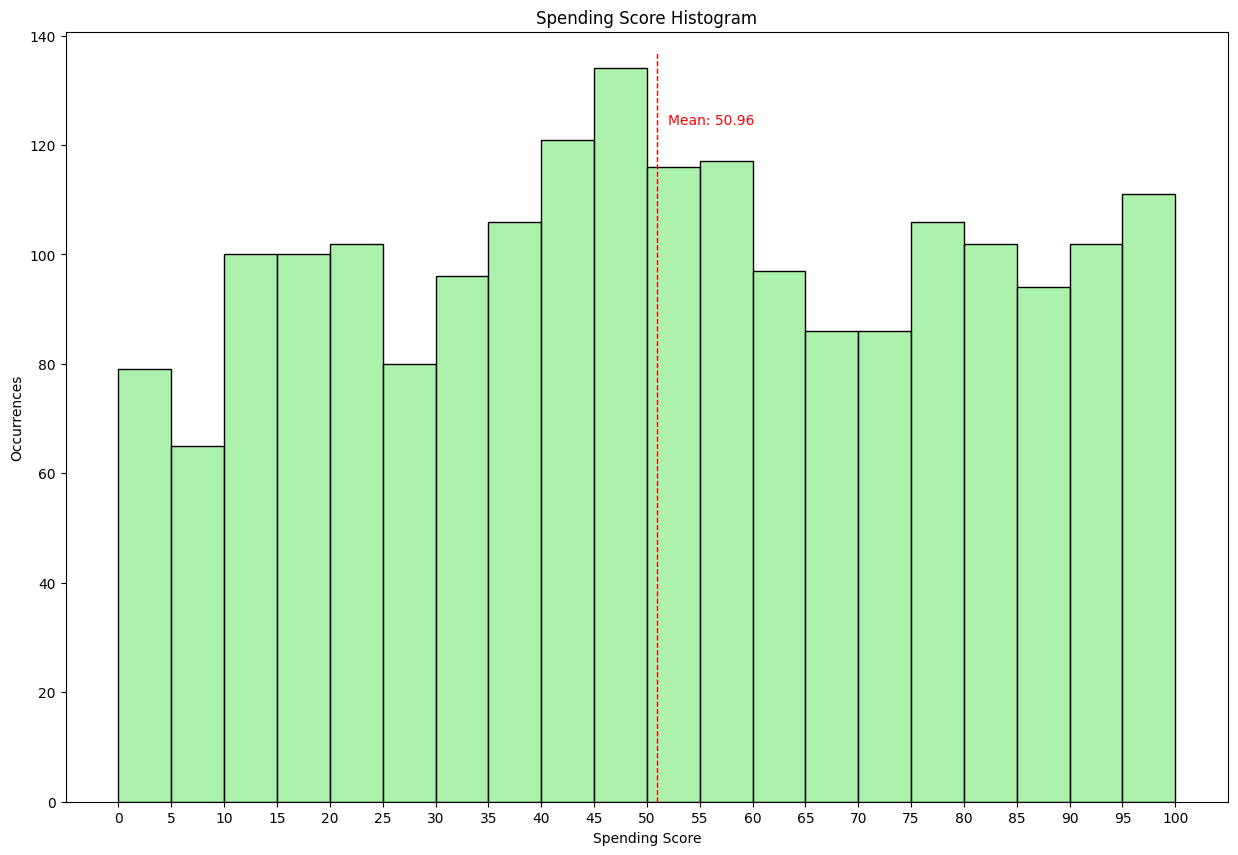

In [515]:
# get minimum and maximum spending score
min_score = customers['Spending Score (1-100)'].min()
max_score = customers['Spending Score (1-100)'].max()

print('Min Spending Score: {:.0f}'.format(min_score))
print('Max Spending Score: {:.0f}'.format(max_score))

# calculate average spending score
average_score = customers['Spending Score (1-100)'].mean()

# calculate standard deviation
std_score = customers['Spending Score (1-100)'].std()
print('Standard Deviation: {:.2f}'.format(std_score))

# histogram
plt.figure(figsize=(15,10))
sns.histplot(customers['Spending Score (1-100)'], bins=range(0, max_score + 5, 5), color='lightgreen')
plt.xticks(np.arange(min_score, max_score + 5, 5))
plt.axvline(average_score, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
plt.text(average_score * 1.02, plt.ylim()[1] * 0.88, 'Mean: {:.2f}'.format(average_score), color='red')

plt.title('Spending Score Histogram')
plt.xlabel('Spending Score')
plt.ylabel('Occurrences')
plt.show()

## Profession

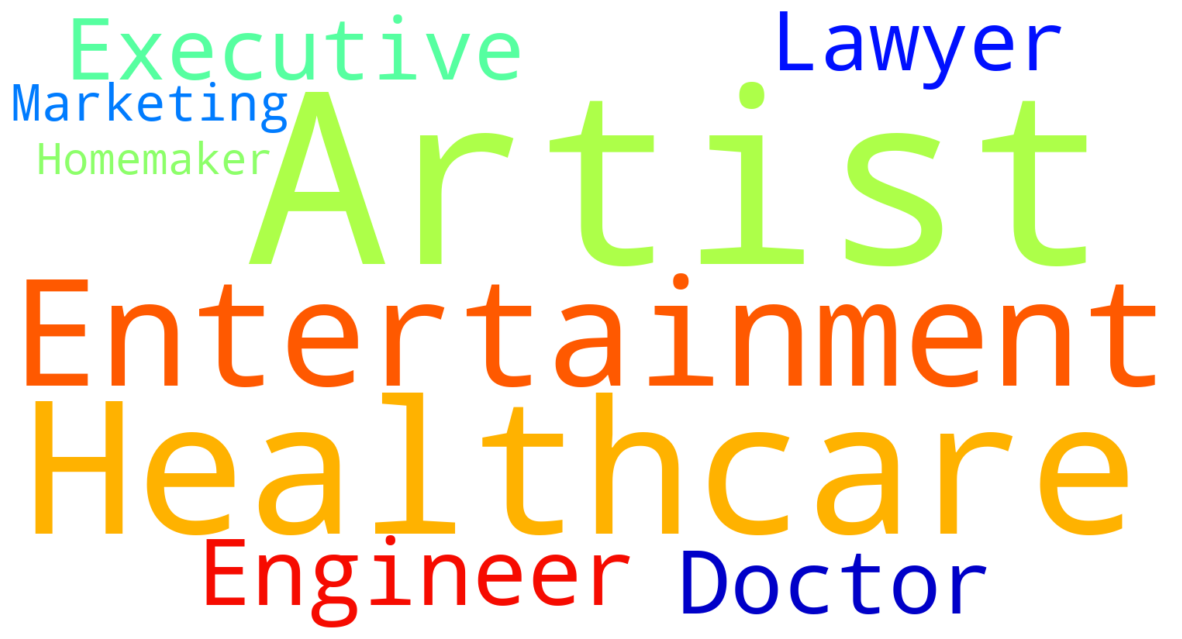

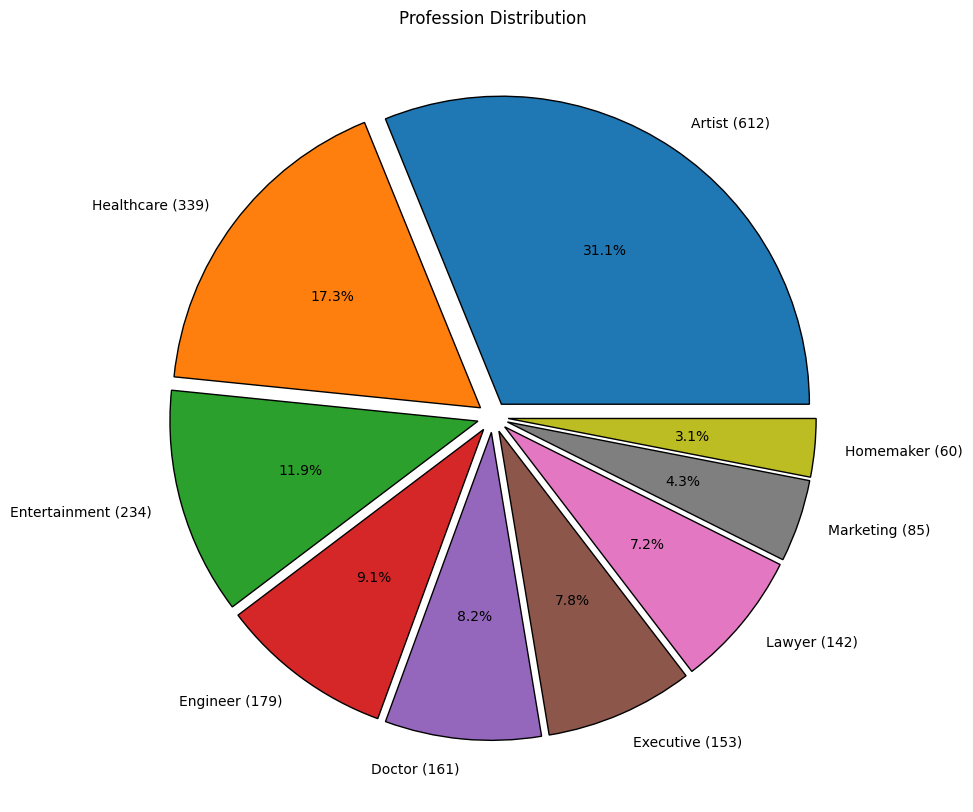

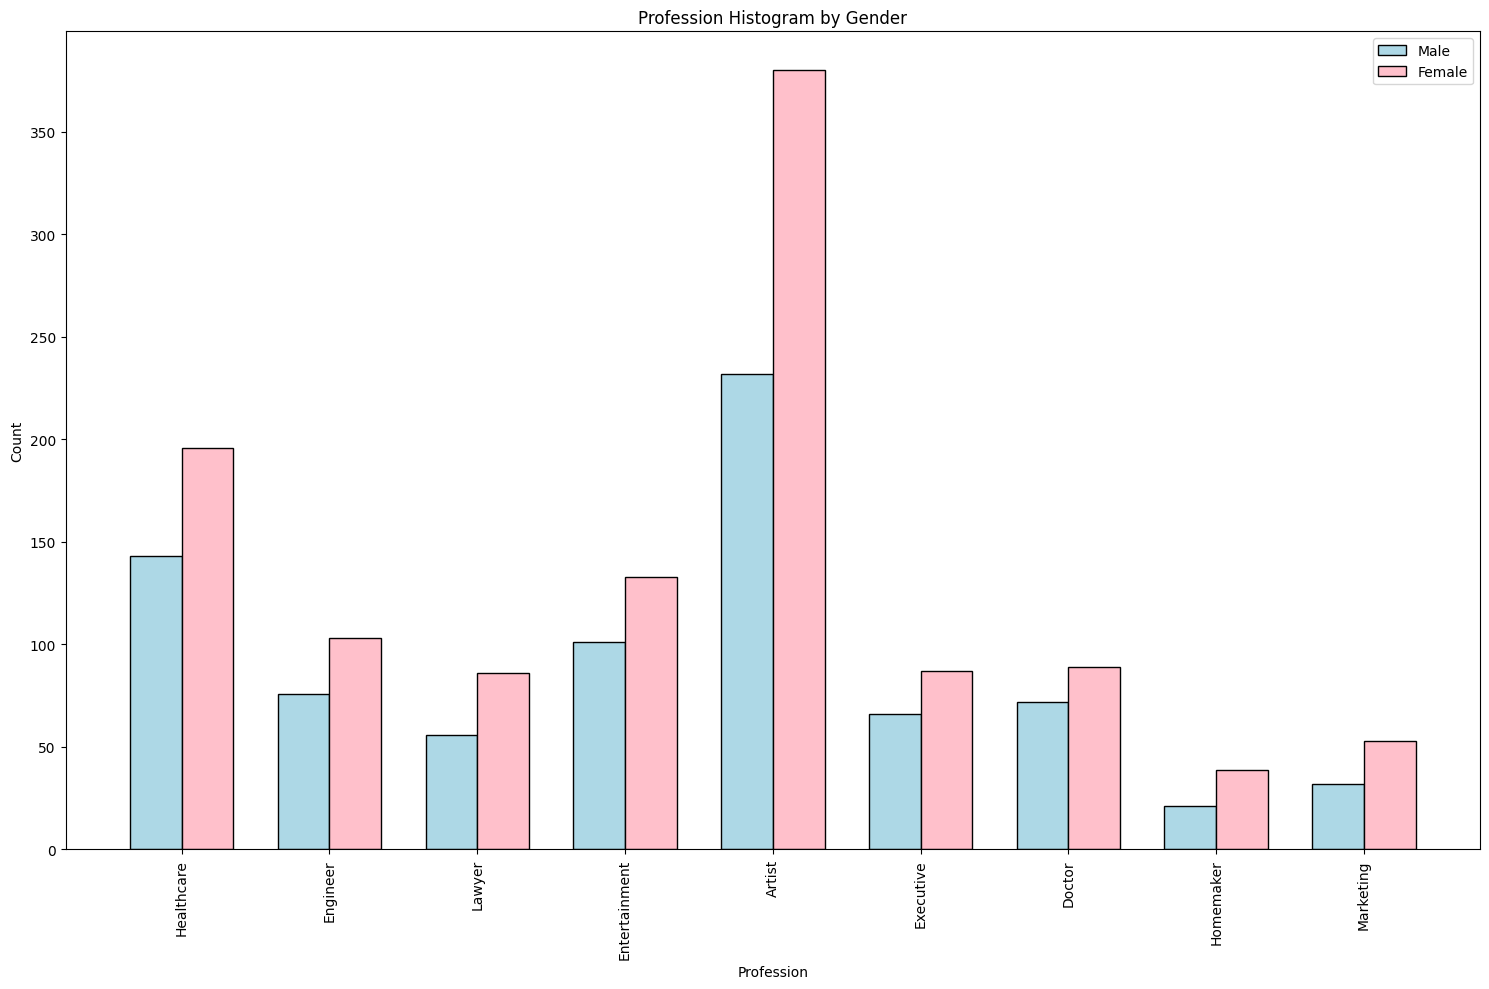

In [516]:
# drop nan values
customers.dropna(subset=['Profession'], inplace=True)

# worldcloud
wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='jet').generate(' '.join(customers['Profession'].astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# pie chart
profession_counts = customers['Profession'].value_counts()

labels = [f'{label} ({count})' for label, count in profession_counts.items()]
explode = (0.05,) * len(profession_counts)

plt.figure(figsize=(15,10))
plt.pie(profession_counts, explode=explode, labels=labels, autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Profession Distribution')
plt.show()

# divide each profession by gender
professions = customers['Profession'].unique()
male_counts = customers[customers['Gender'] == 'Male']['Profession'].value_counts()
female_counts = customers[customers['Gender'] == 'Female']['Profession'].value_counts()

bar_width = 0.35  # Width of the bars
index = np.arange(len(professions))  # Position of bars on x-axis
plt.figure(figsize=(15,10))
plt.bar(index - bar_width/2, [male_counts.get(prof, 0) for prof in professions], bar_width, edgecolor='black', label='Male', color='lightblue')
plt.bar(index + bar_width/2, [female_counts.get(prof, 0) for prof in professions], bar_width, edgecolor='black', label='Female', color='pink')

plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Histogram by Gender')
plt.xticks(index, professions, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Work Experience

Min Work Experience: 0 years
Max Work Experience: 17 years
Standard Deviation: 3.93


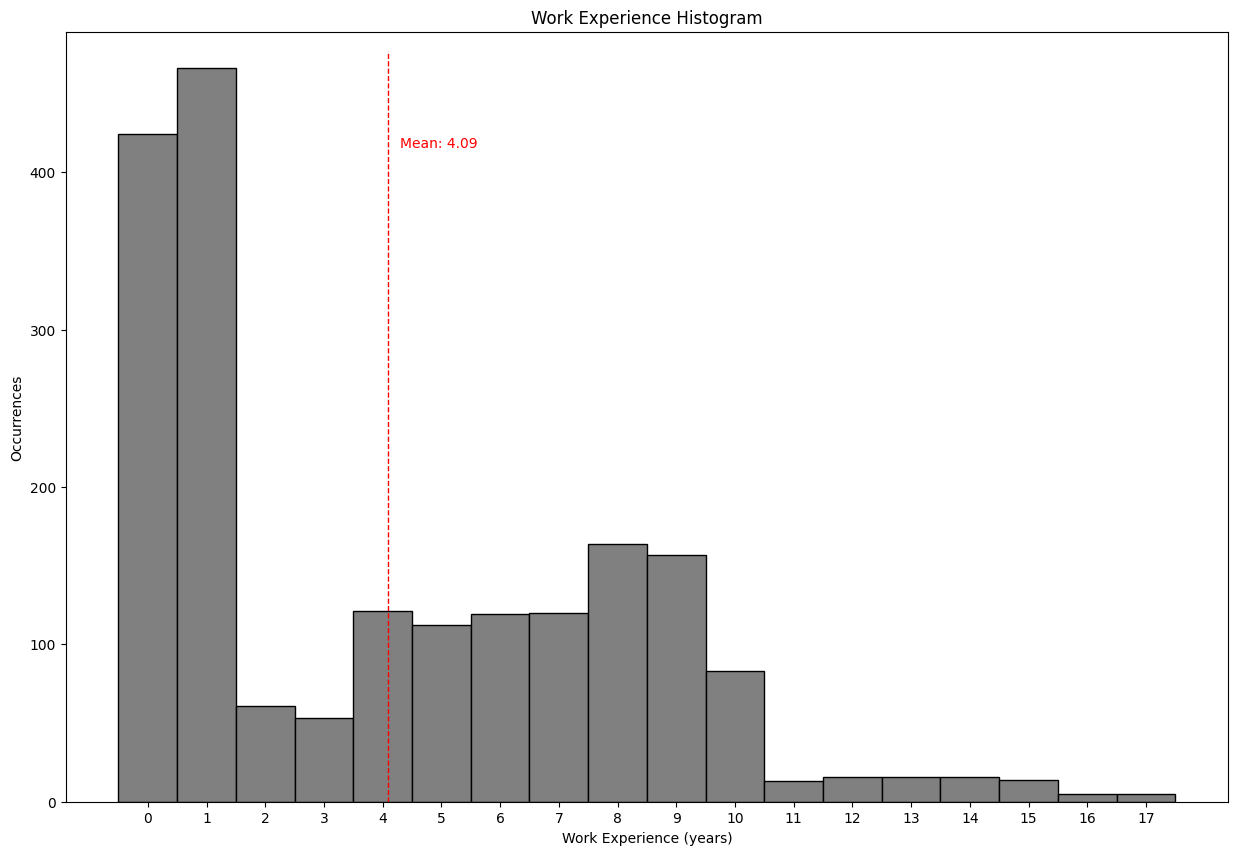

In [517]:
# get minimum and maximum working years
min_work_years = customers['Work Experience'].min()
max_work_years = customers['Work Experience'].max()

print('Min Work Experience: {:.0f} years'.format(min_work_years))
print('Max Work Experience: {:.0f} years'.format(max_work_years))

# calculate average working years
average_work_years = customers['Work Experience'].mean()

# calculate standard deviation
std_work_years = customers['Work Experience'].std()
print('Standard Deviation: {:.2f}'.format(std_work_years))

# histogram
plt.figure(figsize=(15,10))
plt.hist(customers['Work Experience'], bins=range(0, max_work_years + 2), color='gray', edgecolor='black', align='left')
plt.xticks(np.arange(min_work_years, max_work_years + 1, 1))
plt.axvline(average_work_years, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
plt.text(average_work_years * 1.05, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_work_years), color='red')

plt.title('Work Experience Histogram')
plt.xlabel('Work Experience (years)')
plt.ylabel('Occurrences')
plt.show()

## Family Size

Min Family Size: 1
Max Family Size: 9
Standard Deviation: 1.97


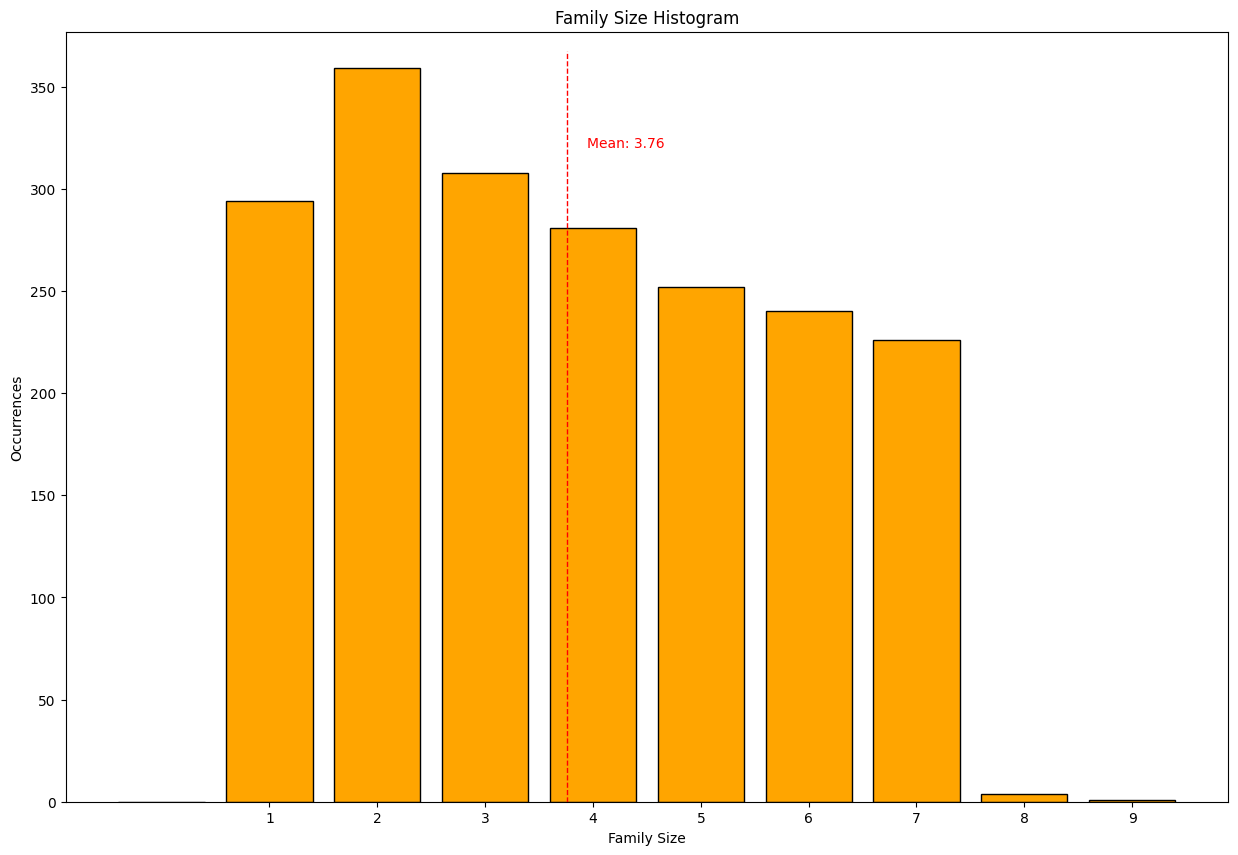

In [518]:
# get minimum and maximum family size
min_family_size = customers['Family Size'].min()
max_family_size = customers['Family Size'].max()

print('Min Family Size: {:.0f}'.format(min_family_size))
print('Max Family Size: {:.0f}'.format(max_family_size))

# calculate average family size
average_family_size = customers['Family Size'].mean()

# calculate standard deviation
std_family_size = customers['Family Size'].std()
print('Standard Deviation: {:.2f}'.format(std_family_size))

# histogram
plt.figure(figsize=(15,10))
plt.hist(customers['Family Size'], bins=range(0, max_family_size + 2), color='orange', edgecolor='black', align='left', rwidth=0.8)
plt.xticks(np.arange(min_family_size, max_family_size + 1, 1))
plt.axvline(average_family_size, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
plt.text(average_family_size * 1.05, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_family_size), color='red')

plt.title('Family Size Histogram')
plt.xlabel('Family Size')
plt.ylabel('Occurrences')
plt.show()

# Data Cleaning

## Age

Since this is a dataset of customers, it's very weird to see extremely young people in it, especially 0 year olds.

In [519]:
customers.loc[customers['Age']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,23.0,1060.086957,586.930685,212.0,561.5,864.0,1594.0,1980.0
Age,23.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Annual Income ($),23.0,117714.521739,42685.736640,22000.0,99974.5,121926.0,143682.5,186002.0
Spending Score (1-100),23.0,57.260870,30.039697,7.0,26.5,63.0,83.5,96.0
Work Experience,23.0,4.130435,4.267257,0.0,1.0,2.0,7.5,15.0
Family Size,23.0,3.956522,2.163294,1.0,2.0,4.0,6.0,7.0


What's even weirder is that they have an income, and some even work experience. This anomaly is probably a data error, so we decided to remove data entries of customers under 18 years old.

In [520]:
customers = customers[customers['Age']>=18]
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1638 non-null   int64 
 1   Gender                  1638 non-null   object
 2   Age                     1638 non-null   int64 
 3   Annual Income ($)       1638 non-null   int64 
 4   Spending Score (1-100)  1638 non-null   int64 
 5   Profession              1638 non-null   object
 6   Work Experience         1638 non-null   int64 
 7   Family Size             1638 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 115.2+ KB


## Work Experience

In the dataset there are customers with 0 work experience, so we assume that:

* People ranging from age 18 to 30 can have zero work experience since it's the average age of people looking for their first job.

* For people older than 30, we replace the zero experience with the median work experience of customers 5 years younger and older from same profession.

In [521]:
customers.loc[customers['Work Experience']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,368.0,912.480978,548.932831,4.0,464.25,923.0,1309.00,1901.0
Age,368.0,57.467391,24.108158,18.0,36.75,57.0,80.00,99.0
Annual Income ($),368.0,104683.894022,47670.672741,1000.0,67905.50,99966.5,144783.25,189945.0
Spending Score (1-100),368.0,49.964674,27.795700,0.0,26.00,51.0,75.00,100.0
Work Experience,368.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Family Size,368.0,3.733696,1.958634,1.0,2.00,4.0,5.00,9.0


In [522]:
for index, row in customers.iterrows():
    if row['Age'] > 30 and row['Work Experience'] == 0:
        profession = row['Profession']
        age = row['Age']
        median_work_experience = customers[(customers['Profession'] == profession) & (customers['Age'] >= age - 5) & (customers['Age'] <= age + 5)]['Work Experience'].median()
        customers.at[index, 'Work Experience'] = median_work_experience

In [523]:
customers.loc[customers['Work Experience']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,64.0,811.078125,605.544024,4.0,193.75,779.5,1280.25,1876.0
Age,64.0,23.562500,3.975620,18.0,20.00,24.0,27.00,30.0
Annual Income ($),64.0,94820.750000,46898.094407,4000.0,59633.00,89908.0,126971.75,189369.0
Spending Score (1-100),64.0,50.250000,28.210659,1.0,28.00,52.0,73.50,99.0
Work Experience,64.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Family Size,64.0,3.593750,1.857791,1.0,2.00,3.5,5.00,7.0


However, there are also 18 year olds with many years of work experience (some even 16!). 
Since we don't know the origin of the data, we decided to keep all the customers which started working at a minimum of 14 years old, which is an acceptable age for light work for most countries, and remove all the others. https://en.wikipedia.org/wiki/Legal_working_age

In [524]:
valid_customers = customers['Work Experience'] <= (customers['Age'] - 14)
customers = customers[valid_customers]

In [525]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1596 non-null   int64  
 1   Gender                  1596 non-null   object 
 2   Age                     1596 non-null   int64  
 3   Annual Income ($)       1596 non-null   int64  
 4   Spending Score (1-100)  1596 non-null   int64  
 5   Profession              1596 non-null   object 
 6   Work Experience         1596 non-null   float64
 7   Family Size             1596 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 112.2+ KB


# Data Preprocessing

Converting categorical data like Gender and Profession into numerical values.

In [526]:
customers_processed = customers.copy()

label_encoder = LabelEncoder()

customers_processed['Gender'] = label_encoder.fit_transform(customers_processed['Gender']) # male as 1 and female as 0
customers_processed['Profession'] = label_encoder.fit_transform(customers_processed['Profession'])

print(customers_processed.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1   19              15000                      39   
1           2       1   21              35000                      81   
2           3       0   20              86000                       6   
3           4       0   23              59000                      77   
4           5       0   31              38000                      40   

   Profession  Work Experience  Family Size  
0           5              1.0            4  
1           2              3.0            3  
2           2              1.0            1  
3           7              0.0            2  
4           3              2.0            6  


Scaling the data.

In [527]:
# scaling the data
scaler = MinMaxScaler()
customers_scaled = pd.DataFrame(scaler.fit_transform(customers_processed), columns=customers_processed.columns, index=customers_processed.index)

# Correlation Analysis

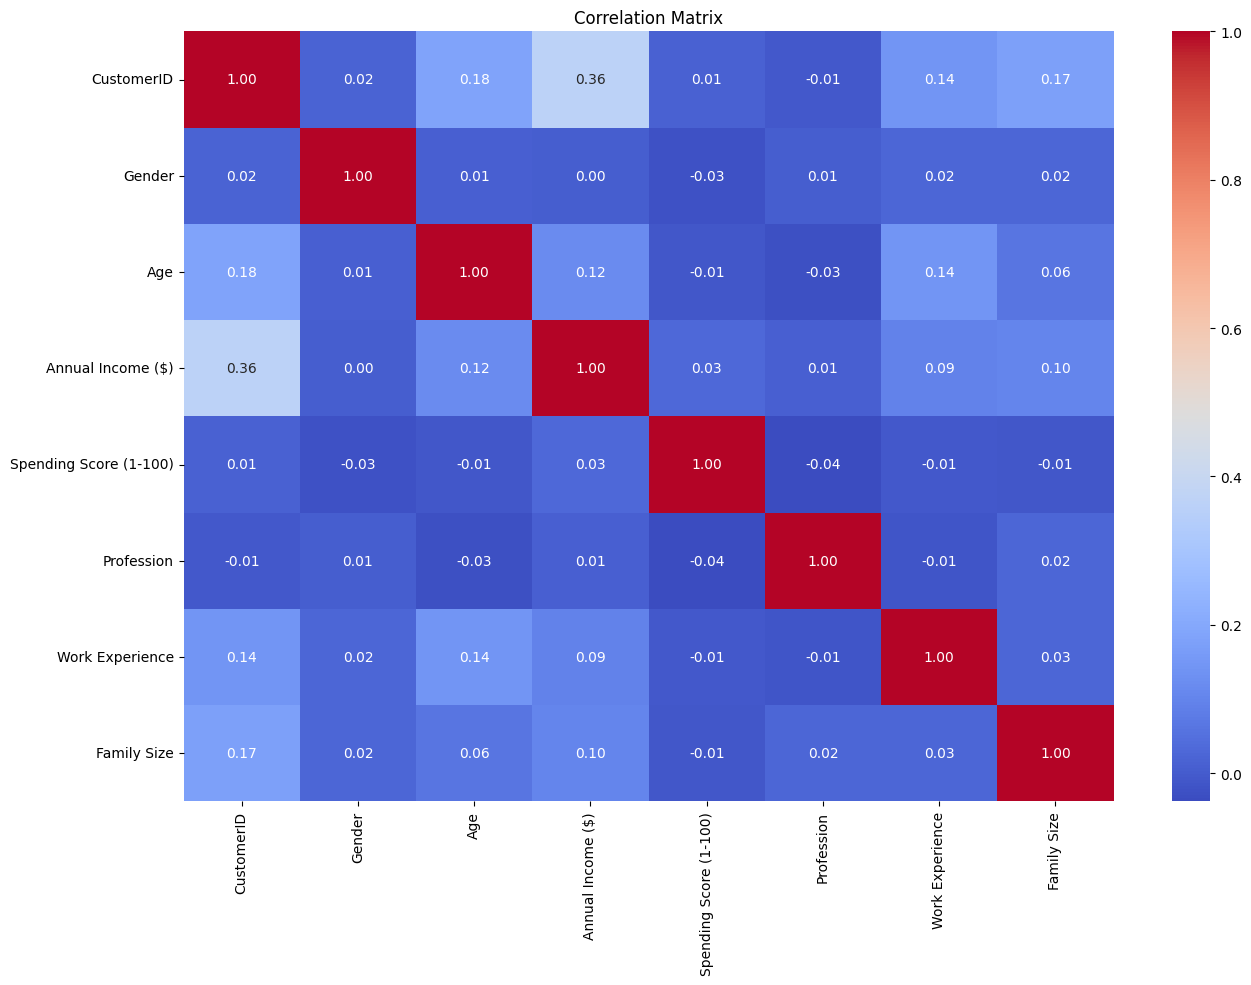

In [528]:
# correlation matrix of features
correlation_matrix = customers_scaled.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Clustering

## Feature Selection

In [529]:
features = customers_scaled[['Annual Income ($)', 'Spending Score (1-100)']]

## K-Means Clustering

In [530]:
# calculate best number of clusters using silhouette score, davies bouldin score, and calinski harabasz score
kmeans_silhouette_scores = []
kmeans_davies_bouldin_scores = []
kmeans_calinski_harabasz_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=17, n_init=10)
    customers_processed['Cluster K-Means'] = kmeans.fit_predict(features)
    kmeans_silhouette_scores.append(silhouette_score(features, customers_processed['Cluster K-Means']))
    kmeans_davies_bouldin_scores.append(davies_bouldin_score(features, customers_processed['Cluster K-Means']))
    kmeans_calinski_harabasz_scores.append(calinski_harabasz_score(features, customers_processed['Cluster K-Means']))

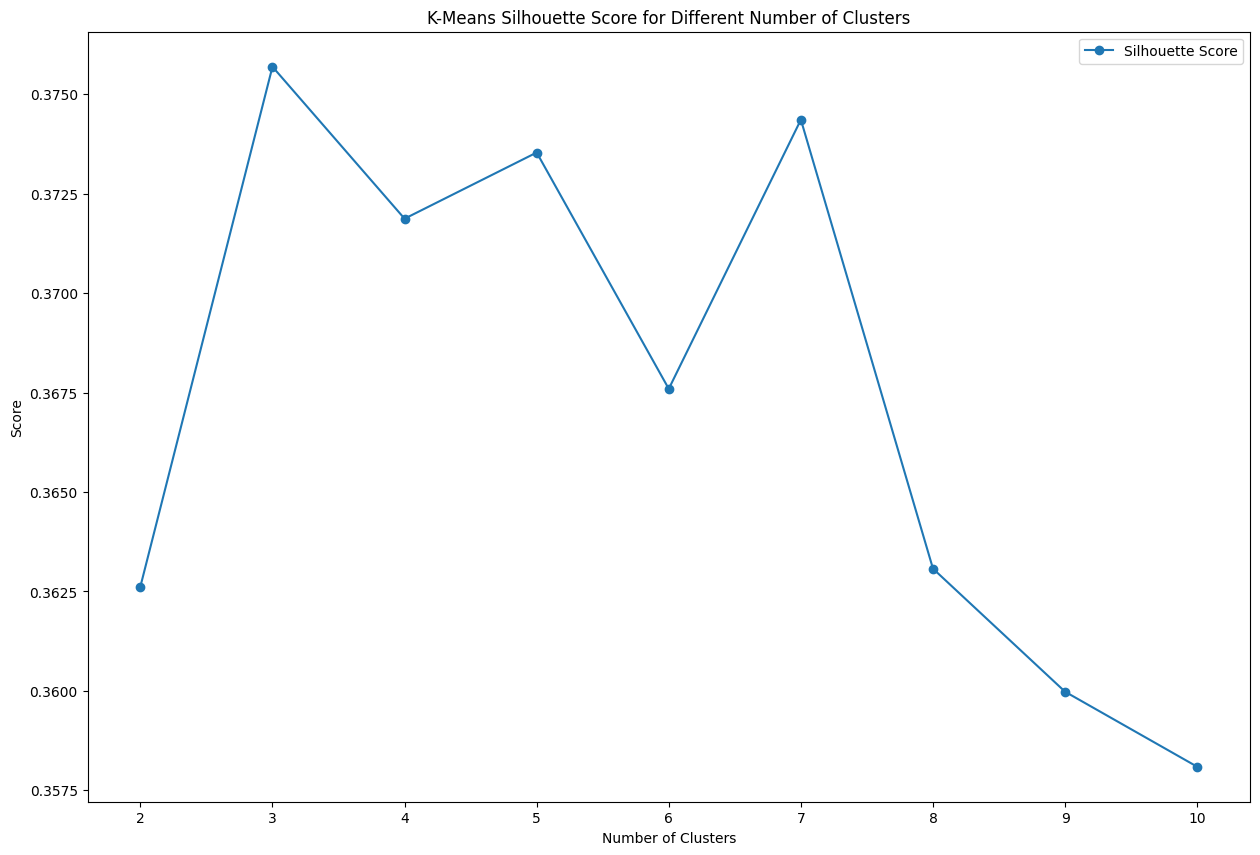

Silhouette Score with 3 clusters: 0.3757
Silhouette Score with 7 clusters: 0.3744
Silhouette Score with 5 clusters: 0.3735


In [531]:
# plot of silhouette score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), kmeans_silhouette_scores, marker='o', label='Silhouette Score')
plt.title('K-Means Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 silhouette scores
silhouette_scores = np.array(kmeans_silhouette_scores)
best_3 = silhouette_scores.argsort()[::-1]
for i in range(3):
    print(f'Silhouette Score with {best_3[i] + 2} clusters: {silhouette_scores[best_3[i]]:.4f}')

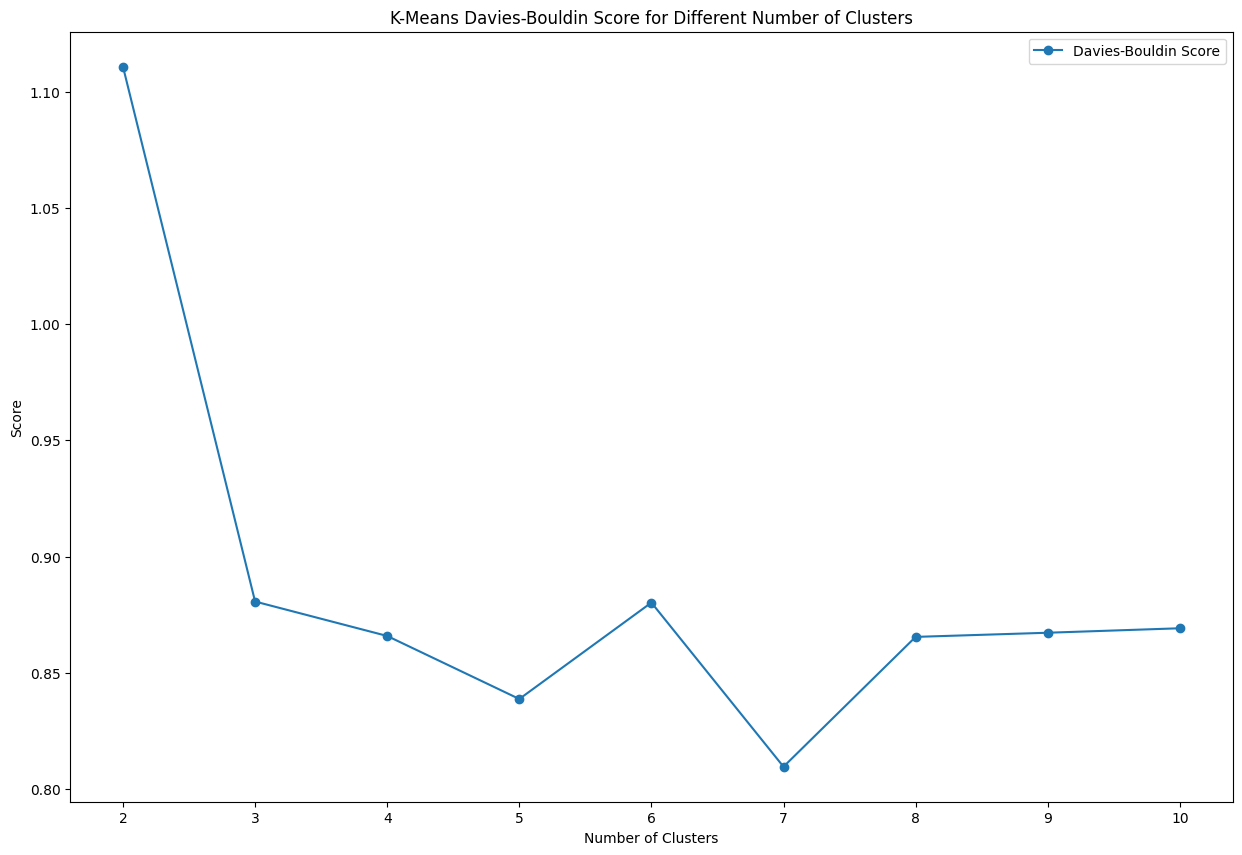

Davies-Bouldin Score with 7 clusters: 0.8096
Davies-Bouldin Score with 5 clusters: 0.8387
Davies-Bouldin Score with 8 clusters: 0.8655


In [532]:
# plot of davies bouldin score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), kmeans_davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.title('K-Means Davies-Bouldin Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 davies bouldin scores
davies_bouldin_scores = np.array(kmeans_davies_bouldin_scores)
best_3 = davies_bouldin_scores.argsort()
for i in range(3):
    print(f'Davies-Bouldin Score with {best_3[i] + 2} clusters: {davies_bouldin_scores[best_3[i]]:.4f}')

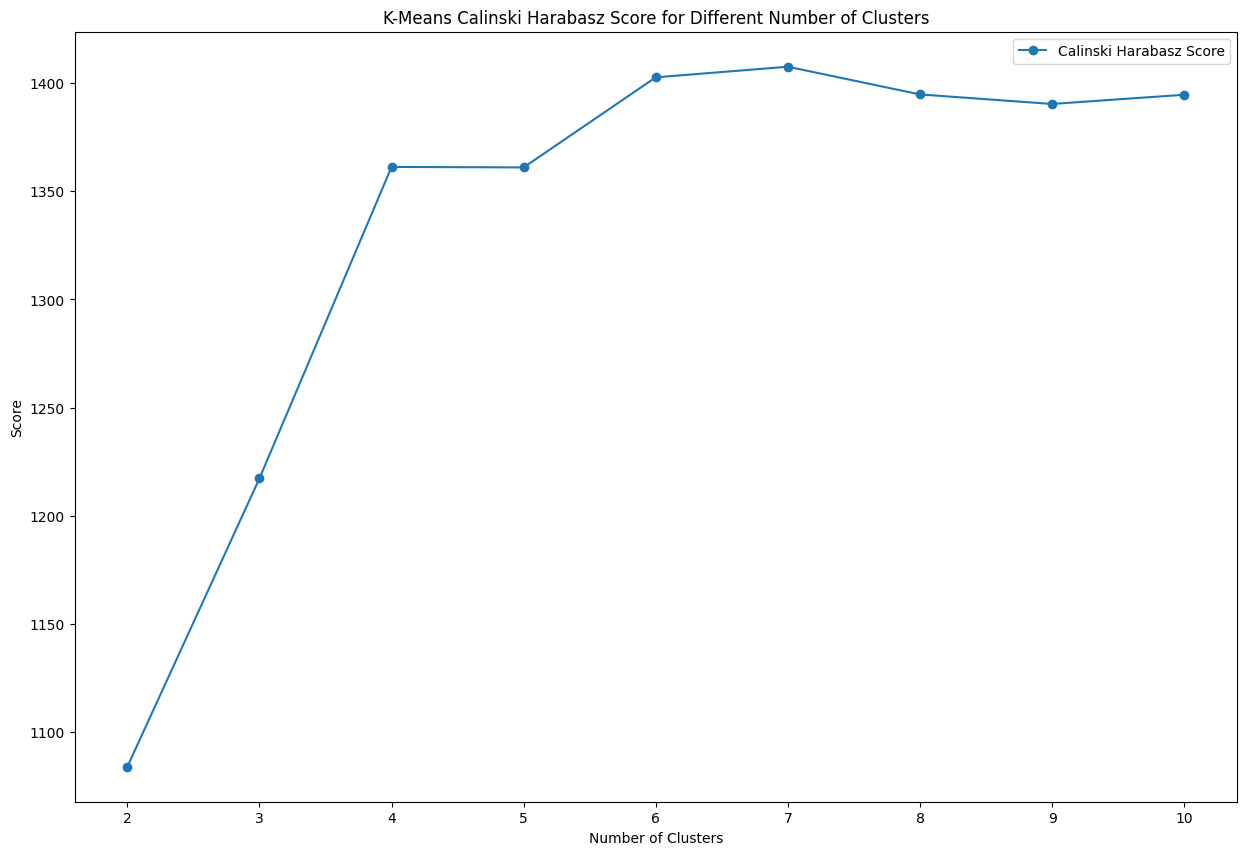

Calinski Harabasz Score with 7 clusters: 1407.6753
Calinski Harabasz Score with 6 clusters: 1402.7717
Calinski Harabasz Score with 8 clusters: 1394.8534


In [533]:
# plot of calinski harabasz score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), kmeans_calinski_harabasz_scores, marker='o', label='Calinski Harabasz Score')
plt.title('K-Means Calinski Harabasz Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 calinski harabasz scores
calinski_harabasz_scores = np.array(kmeans_calinski_harabasz_scores)
best_3 = calinski_harabasz_scores.argsort()[::-1]
for i in range(3):
    print(f'Calinski Harabasz Score with {best_3[i] + 2} clusters: {calinski_harabasz_scores[best_3[i]]:.4f}')

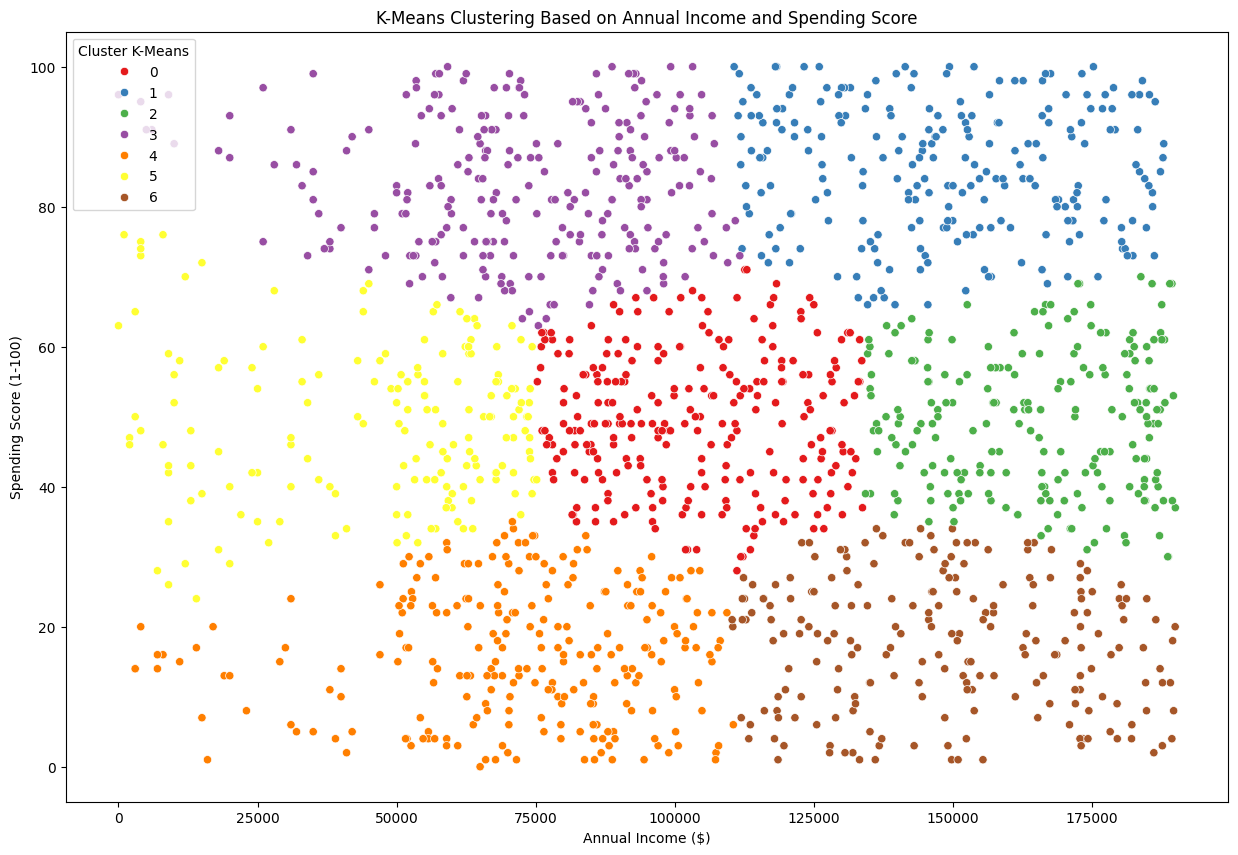

Silhouette Score: 0.37
Davies-Bouldin Score: 0.81
Calinski Harabasz Score: 1407.68


In [534]:
# K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=17, n_init=10)
customers_processed['Cluster K-Means'] = kmeans.fit_predict(features)

# scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster K-Means', data=customers_processed, palette='Set1')
plt.title('K-Means Clustering Based on Annual Income and Spending Score')
plt.show()

# evaluation metrics
kmeans_silhouette_score = silhouette_score(features, customers_processed['Cluster K-Means'])
kmeans_davies_bouldin_score = davies_bouldin_score(features, customers_processed['Cluster K-Means'])
kmeans_calinski_harabasz_score = calinski_harabasz_score(features, customers_processed['Cluster K-Means'])

print('Silhouette Score: {:.2f}'.format(kmeans_silhouette_score))
print('Davies-Bouldin Score: {:.2f}'.format(kmeans_davies_bouldin_score))
print('Calinski Harabasz Score: {:.2f}'.format(kmeans_calinski_harabasz_score))

## Hierarchical Agglomerative Clustering

### Annual Income and Spending Score

In [535]:
features = customers_scaled[['Annual Income ($)', 'Spending Score (1-100)']]

In [536]:
# calculate best number of clusters using silhouette score, davies bouldin score, and calinski harabasz score
hierarchical_silhouette_scores = []
hierarchical_davies_bouldin_scores = []
hierarchical_calinski_harabasz_scores = []

for i in range(2, 11):
    kmeans = AgglomerativeClustering(n_clusters=i)
    customers_processed['Cluster Hierarchical'] = kmeans.fit_predict(features)
    hierarchical_silhouette_scores.append(silhouette_score(features, customers_processed['Cluster Hierarchical']))
    hierarchical_davies_bouldin_scores.append(davies_bouldin_score(features, customers_processed['Cluster Hierarchical']))
    hierarchical_calinski_harabasz_scores.append(calinski_harabasz_score(features, customers_processed['Cluster Hierarchical']))

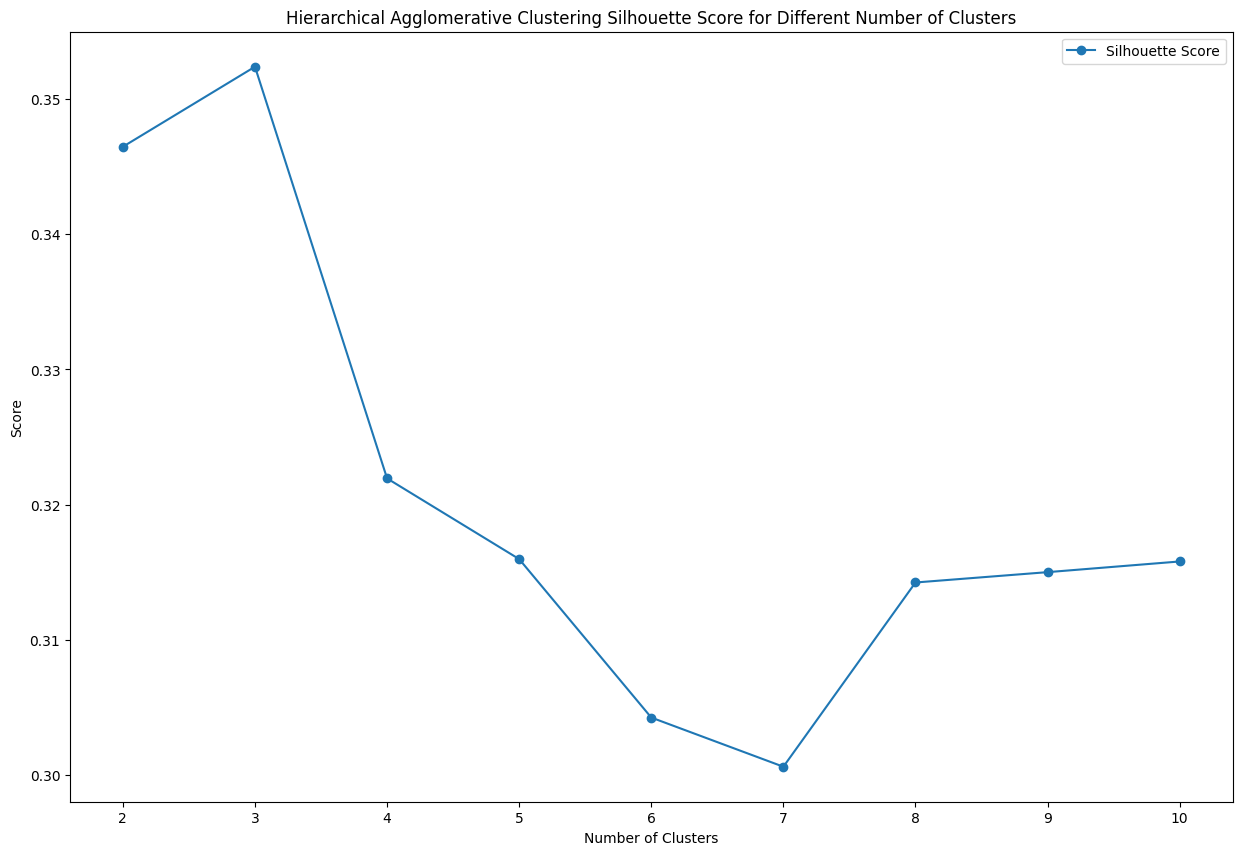

Silhouette Score with 3 clusters: 0.3524
Silhouette Score with 2 clusters: 0.3465
Silhouette Score with 4 clusters: 0.3219


In [537]:
# plot of silhouette score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), hierarchical_silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Hierarchical Agglomerative Clustering Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 silhouette scores
silhouette_scores = np.array(hierarchical_silhouette_scores)
best_3 = silhouette_scores.argsort()[::-1]
for i in range(3):
    print(f'Silhouette Score with {best_3[i] + 2} clusters: {silhouette_scores[best_3[i]]:.4f}')

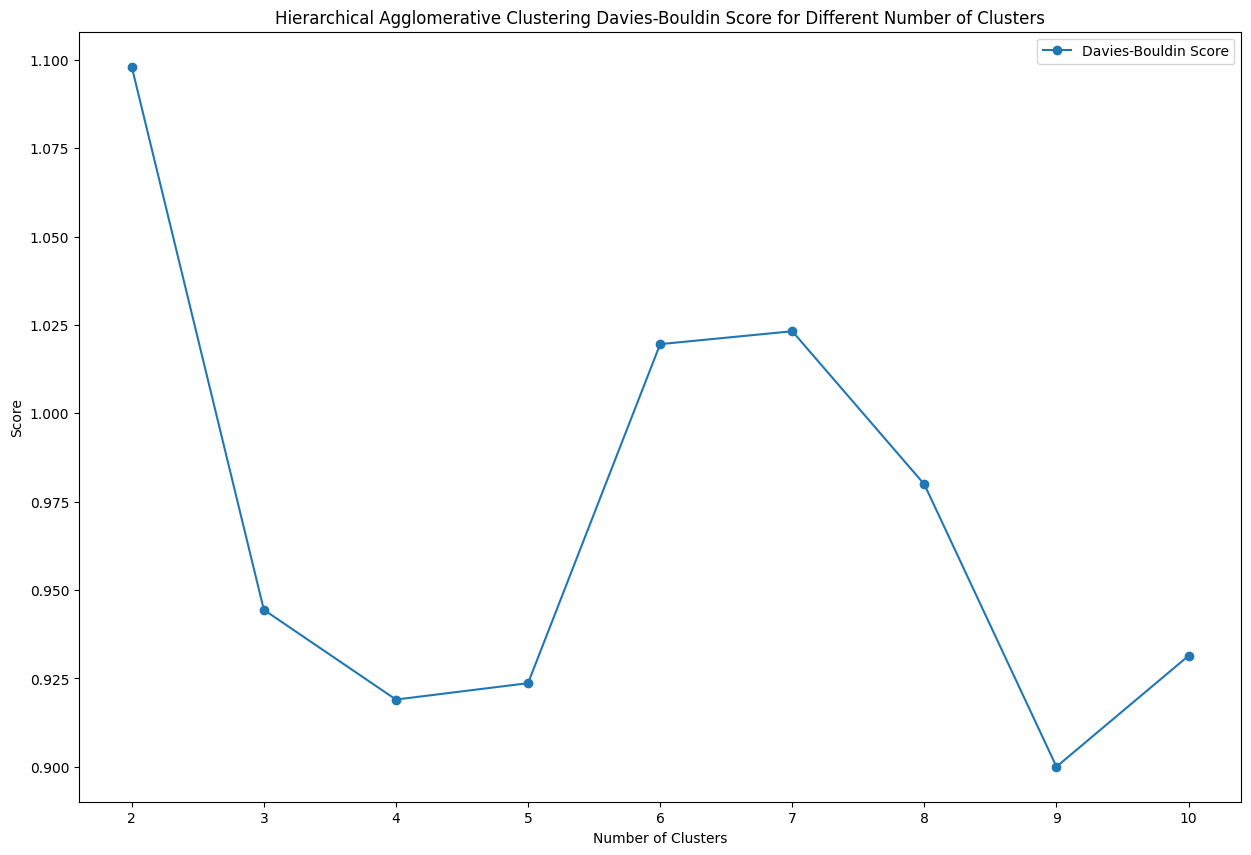

Davies-Bouldin Score with 9 clusters: 0.9000
Davies-Bouldin Score with 4 clusters: 0.9190
Davies-Bouldin Score with 5 clusters: 0.9237


In [538]:
# plot of davies bouldin score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), hierarchical_davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.title('Hierarchical Agglomerative Clustering Davies-Bouldin Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 davies bouldin scores
davies_bouldin_scores = np.array(hierarchical_davies_bouldin_scores)
best_3 = davies_bouldin_scores.argsort()
for i in range(3):
    print(f'Davies-Bouldin Score with {best_3[i] + 2} clusters: {davies_bouldin_scores[best_3[i]]:.4f}')

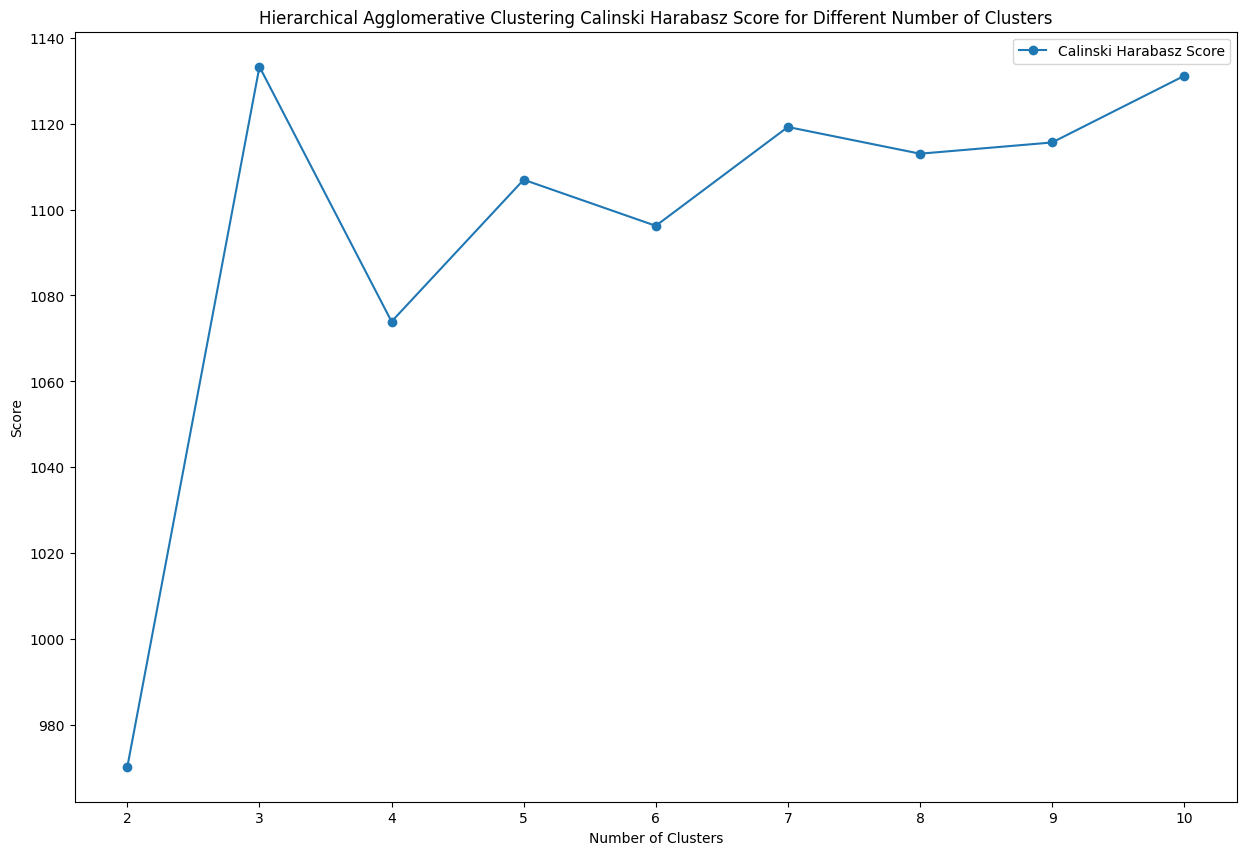

Calinski Harabasz Score with 3 clusters: 1133.2277
Calinski Harabasz Score with 10 clusters: 1131.1040
Calinski Harabasz Score with 7 clusters: 1119.2054


In [539]:
# plot of calinski harabasz score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), hierarchical_calinski_harabasz_scores, marker='o', label='Calinski Harabasz Score')
plt.title('Hierarchical Agglomerative Clustering Calinski Harabasz Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 calinski harabasz scores
calinski_harabasz_scores = np.array(hierarchical_calinski_harabasz_scores)
best_3 = calinski_harabasz_scores.argsort()[::-1]
for i in range(3):
    print(f'Calinski Harabasz Score with {best_3[i] + 2} clusters: {calinski_harabasz_scores[best_3[i]]:.4f}')

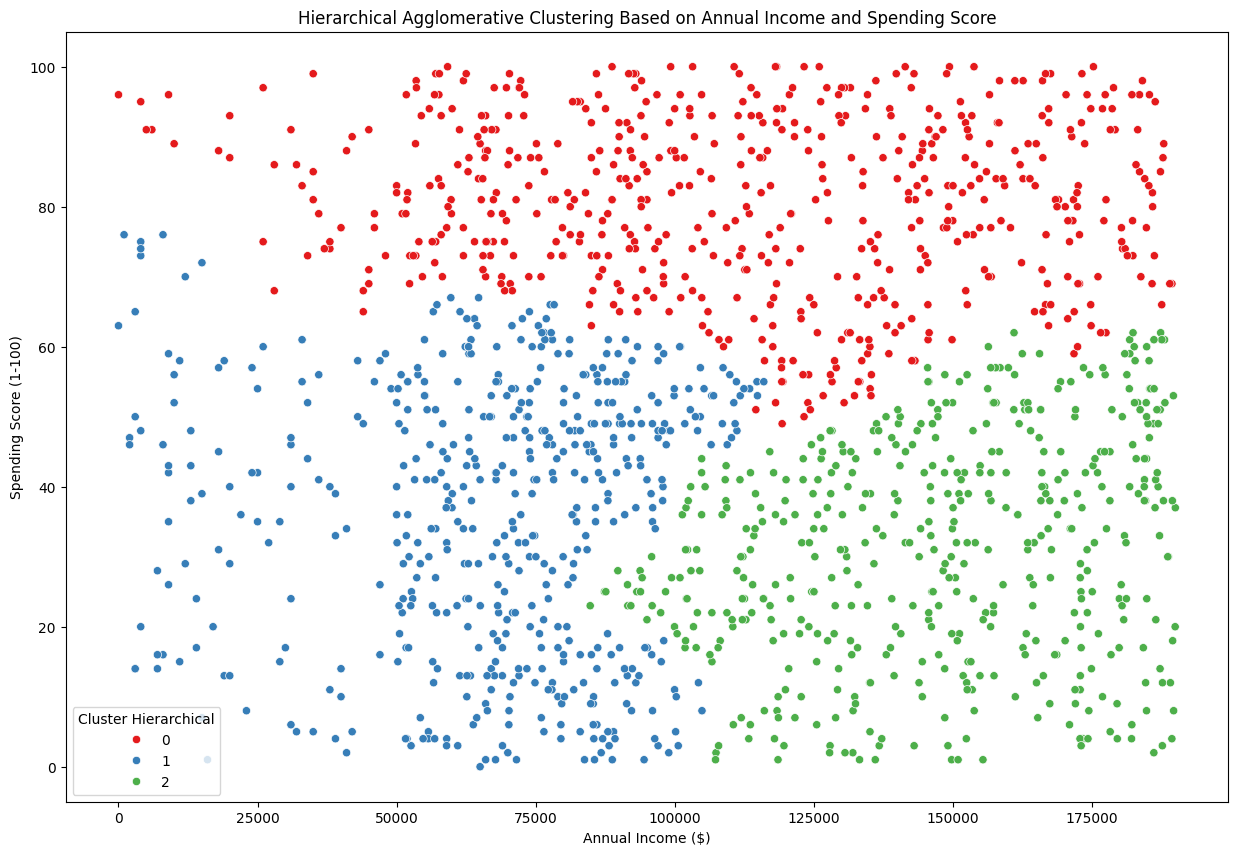

Silhouette Score: 0.35
Davies-Bouldin Score: 0.94
Calinski Harabasz Score: 1133.23


In [540]:
# hierarchical agglomerative clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
customers_processed['Cluster Hierarchical'] = hierarchical.fit_predict(features)

# scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster Hierarchical', data=customers_processed, palette='Set1')
plt.title('Hierarchical Agglomerative Clustering Based on Annual Income and Spending Score')
plt.show()

# evaluation metrics
hierarchical_silhouette_score = silhouette_score(features, customers_processed['Cluster Hierarchical'])
hierarchical_davies_bouldin_score = davies_bouldin_score(features, customers_processed['Cluster Hierarchical'])
hierarchical_calinski_harabasz_score = calinski_harabasz_score(features, customers_processed['Cluster Hierarchical'])

print('Silhouette Score: {:.2f}'.format(hierarchical_silhouette_score))
print('Davies-Bouldin Score: {:.2f}'.format(hierarchical_davies_bouldin_score))
print('Calinski Harabasz Score: {:.2f}'.format(hierarchical_calinski_harabasz_score))

## Gaussian Mixture Model

### Annual Income and Spending Score

In [541]:
# calculate best number of clusters using silhouette score, davies bouldin score, and calinski harabasz score
gmm_silhouette_scores = []
gmm_davies_bouldin_scores = []
gmm_calinski_harabasz_scores = []

for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=17)
    customers_processed['Cluster GMM'] = gmm.fit_predict(features)
    gmm_silhouette_scores.append(silhouette_score(features, customers_processed['Cluster GMM']))
    gmm_davies_bouldin_scores.append(davies_bouldin_score(features, customers_processed['Cluster GMM']))
    gmm_calinski_harabasz_scores.append(calinski_harabasz_score(features, customers_processed['Cluster GMM']))

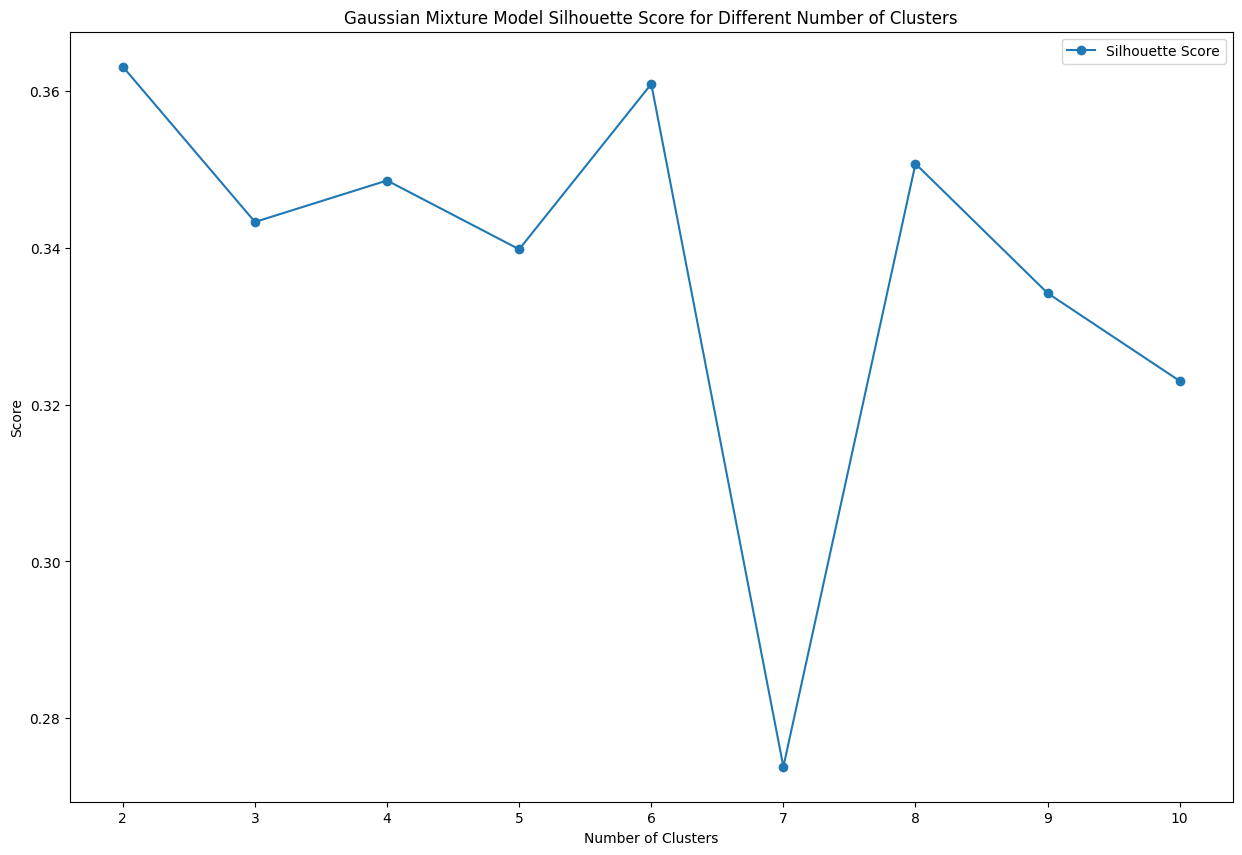

Silhouette Score with 2 clusters: 0.3631
Silhouette Score with 6 clusters: 0.3609
Silhouette Score with 8 clusters: 0.3507


In [542]:
# plot of silhouette score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), gmm_silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Gaussian Mixture Model Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 silhouette scores
silhouette_scores = np.array(gmm_silhouette_scores)
best_3 = silhouette_scores.argsort()[::-1]
for i in range(3):
    print(f'Silhouette Score with {best_3[i] + 2} clusters: {silhouette_scores[best_3[i]]:.4f}')

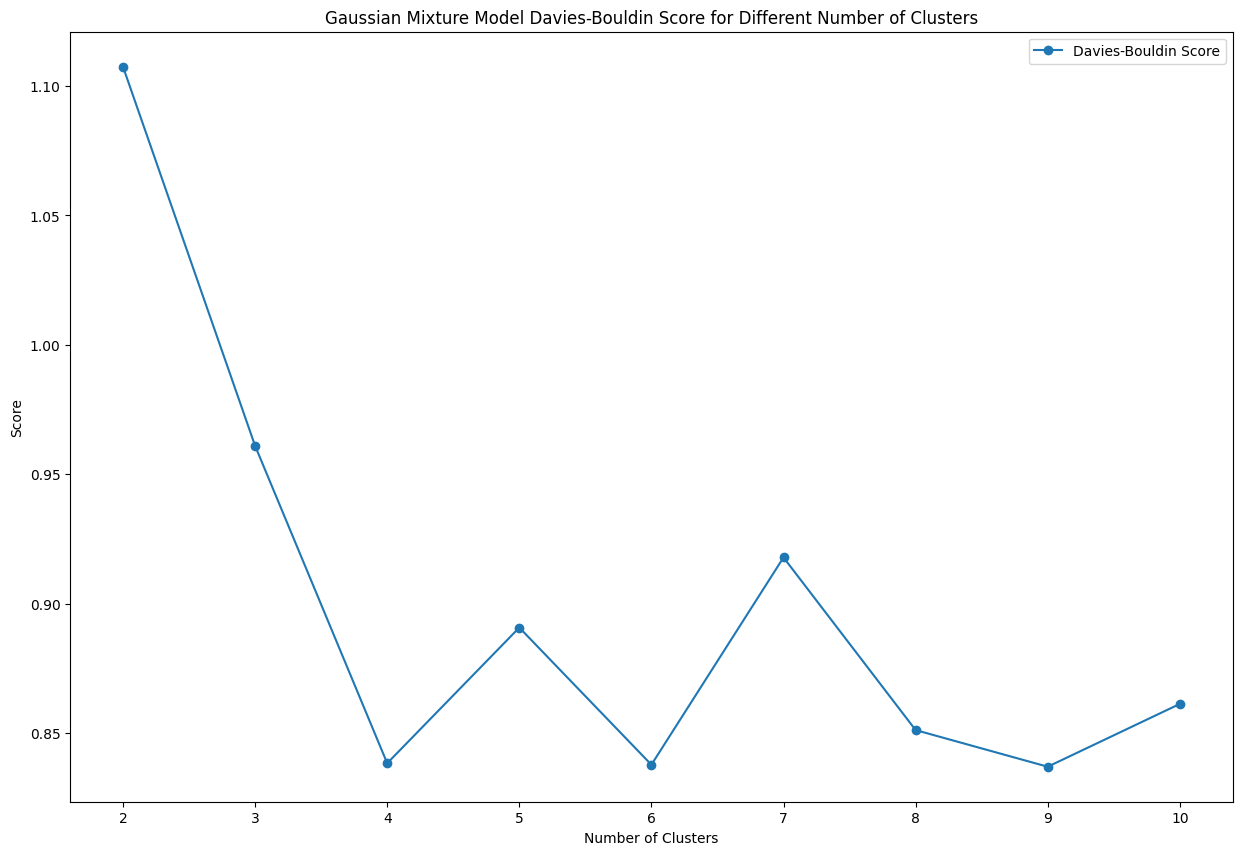

Davies-Bouldin Score with 9 clusters: 0.8369
Davies-Bouldin Score with 6 clusters: 0.8377
Davies-Bouldin Score with 4 clusters: 0.8383


In [543]:
# plot of davies bouldin score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), gmm_davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.title('Gaussian Mixture Model Davies-Bouldin Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 davies bouldin scores
davies_bouldin_scores = np.array(gmm_davies_bouldin_scores)
best_3 = davies_bouldin_scores.argsort()
for i in range(3):
    print(f'Davies-Bouldin Score with {best_3[i] + 2} clusters: {davies_bouldin_scores[best_3[i]]:.4f}')

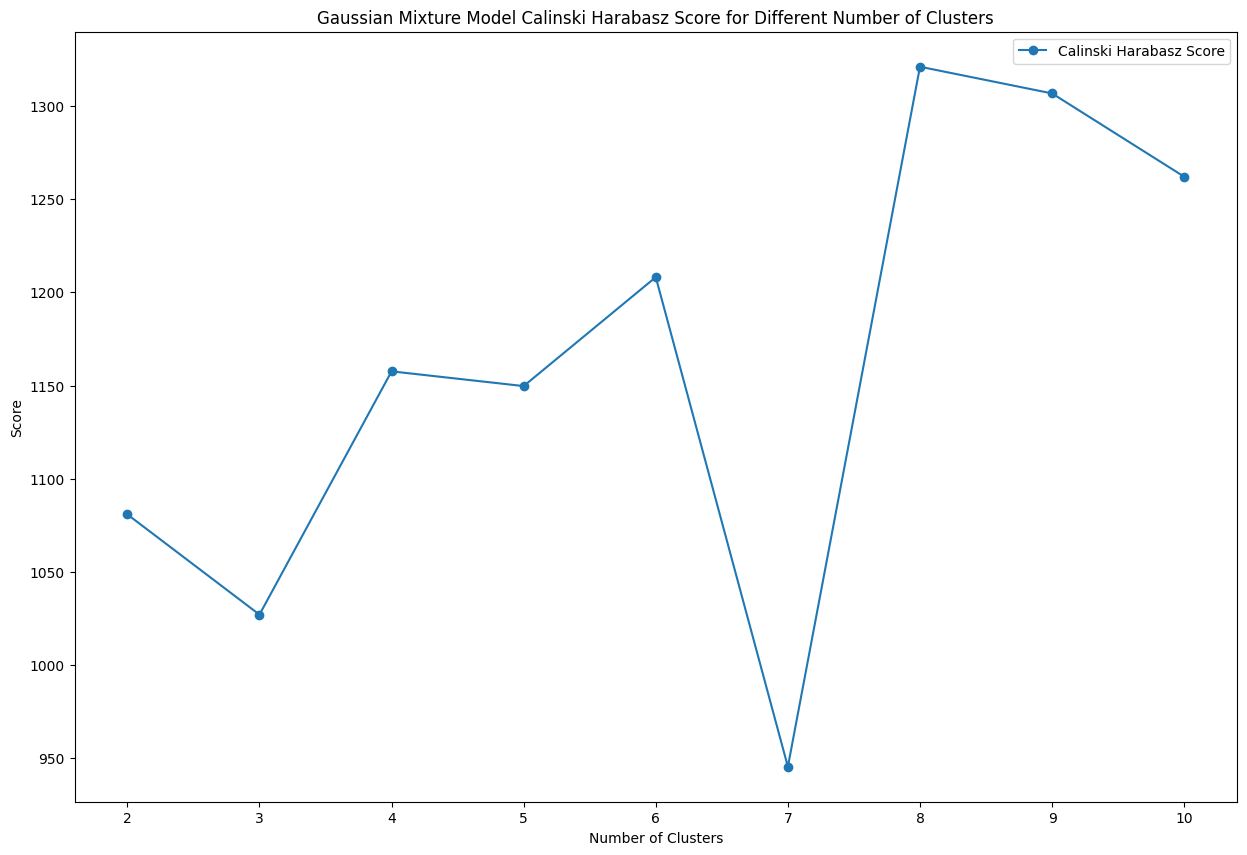

Calinski Harabasz Score with 8 clusters: 1321.0773
Calinski Harabasz Score with 9 clusters: 1306.7509
Calinski Harabasz Score with 10 clusters: 1262.0769


In [544]:
# plot of calinski harabasz score
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), gmm_calinski_harabasz_scores, marker='o', label='Calinski Harabasz Score')
plt.title('Gaussian Mixture Model Calinski Harabasz Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# print best 3 calinski harabasz scores
calinski_harabasz_scores = np.array(gmm_calinski_harabasz_scores)
best_3 = calinski_harabasz_scores.argsort()[::-1]
for i in range(3):
    print(f'Calinski Harabasz Score with {best_3[i] + 2} clusters: {calinski_harabasz_scores[best_3[i]]:.4f}')

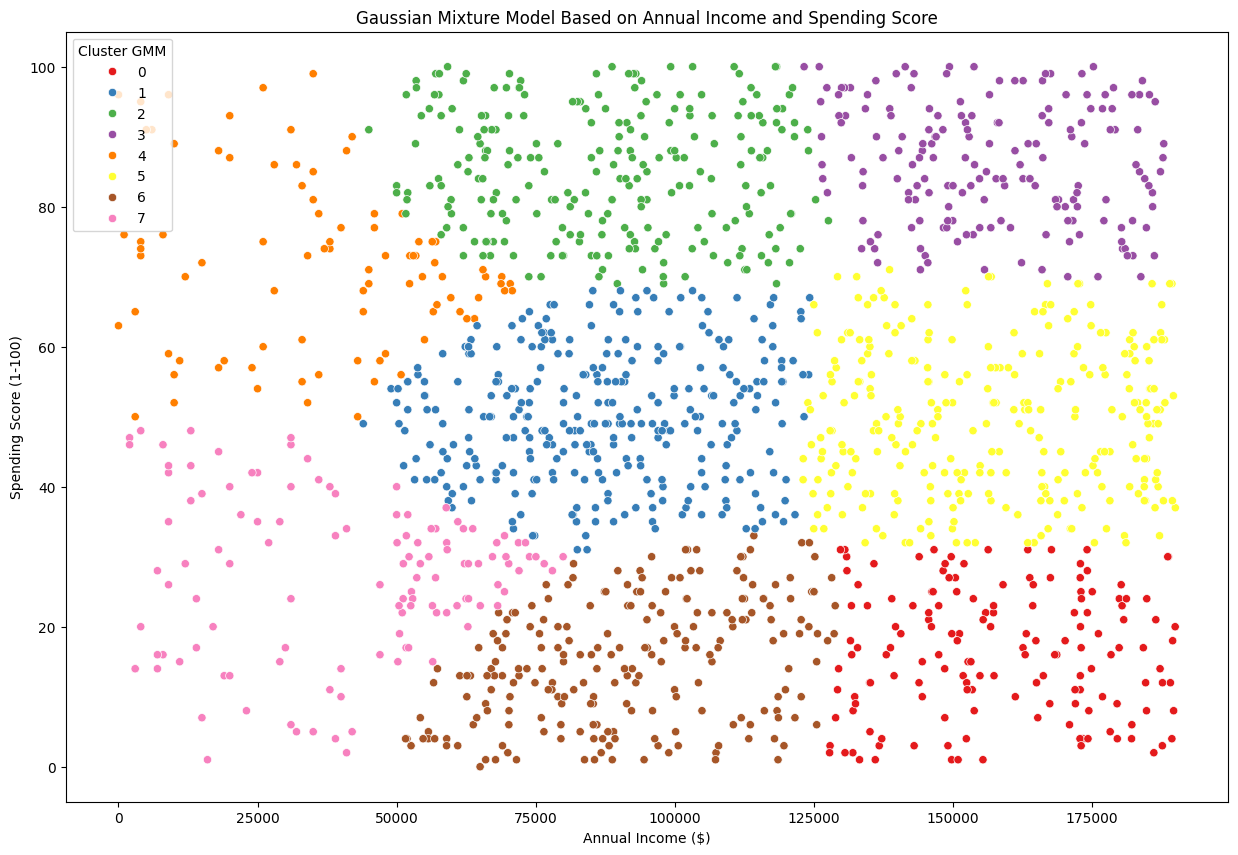

Silhouette Score: 0.35
Davies-Bouldin Score: 0.85
Calinski Harabasz Score: 1321.08


In [545]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=8, random_state=17)
customers_processed['Cluster GMM'] = gmm.fit_predict(features)

# scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster GMM', data=customers_processed, palette='Set1')
plt.title('Gaussian Mixture Model Based on Annual Income and Spending Score')
plt.show()

# evaluation metrics
gmm_silhouette_score = silhouette_score(features, customers_processed['Cluster GMM'])
gmm_davies_bouldin_score = davies_bouldin_score(features, customers_processed['Cluster GMM'])
gmm_calinski_harabasz_score = calinski_harabasz_score(features, customers_processed['Cluster GMM'])

print('Silhouette Score: {:.2f}'.format(gmm_silhouette_score))
print('Davies-Bouldin Score: {:.2f}'.format(gmm_davies_bouldin_score))
print('Calinski Harabasz Score: {:.2f}'.format(gmm_calinski_harabasz_score))

## K-Means vs Hierarchical Clustering vs Gaussian Mixture Model

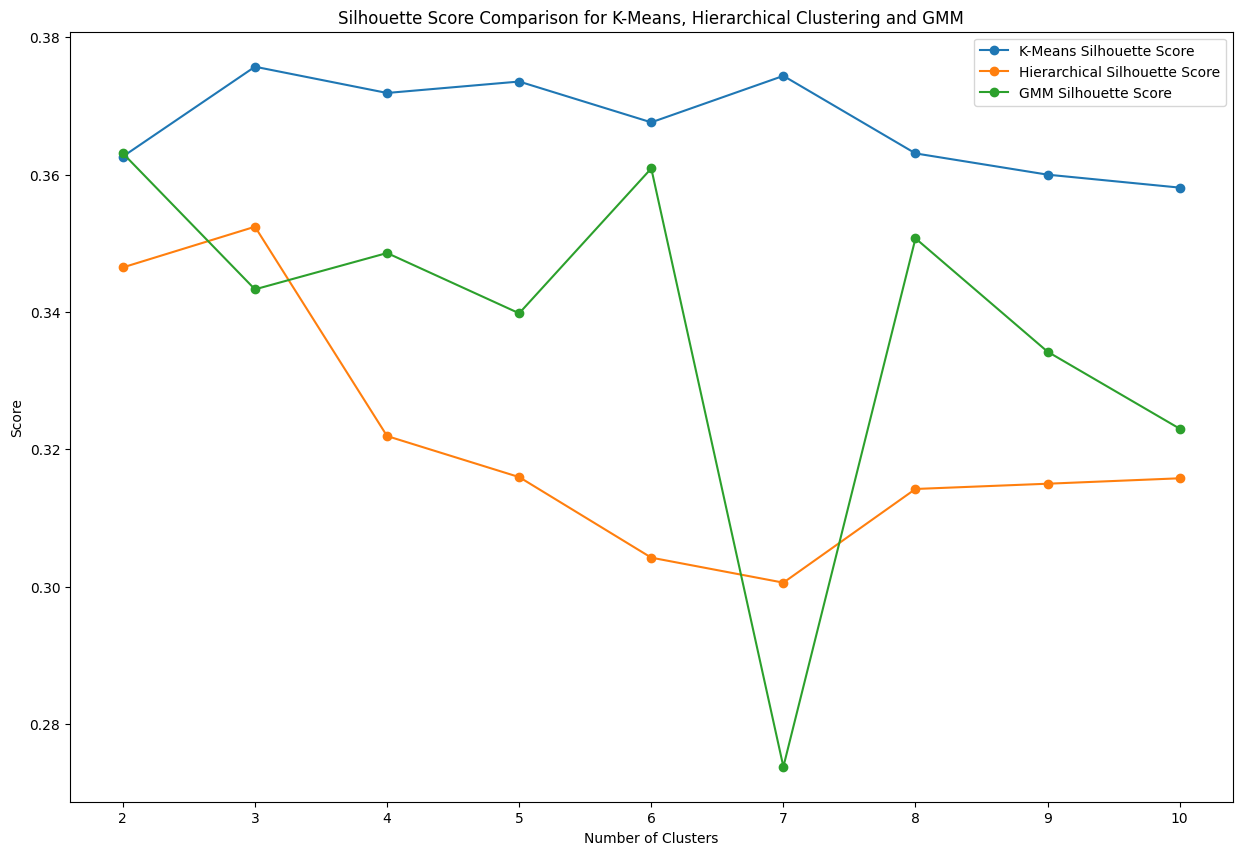

In [546]:
# compare silhouette scores plots of kmeans, hierarchical and gmm
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), kmeans_silhouette_scores, marker='o', label='K-Means Silhouette Score')
plt.plot(range(2, 11), hierarchical_silhouette_scores, marker='o', label='Hierarchical Silhouette Score')
plt.plot(range(2, 11), gmm_silhouette_scores, marker='o', label='GMM Silhouette Score')
plt.title('Silhouette Score Comparison for K-Means, Hierarchical Clustering and GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

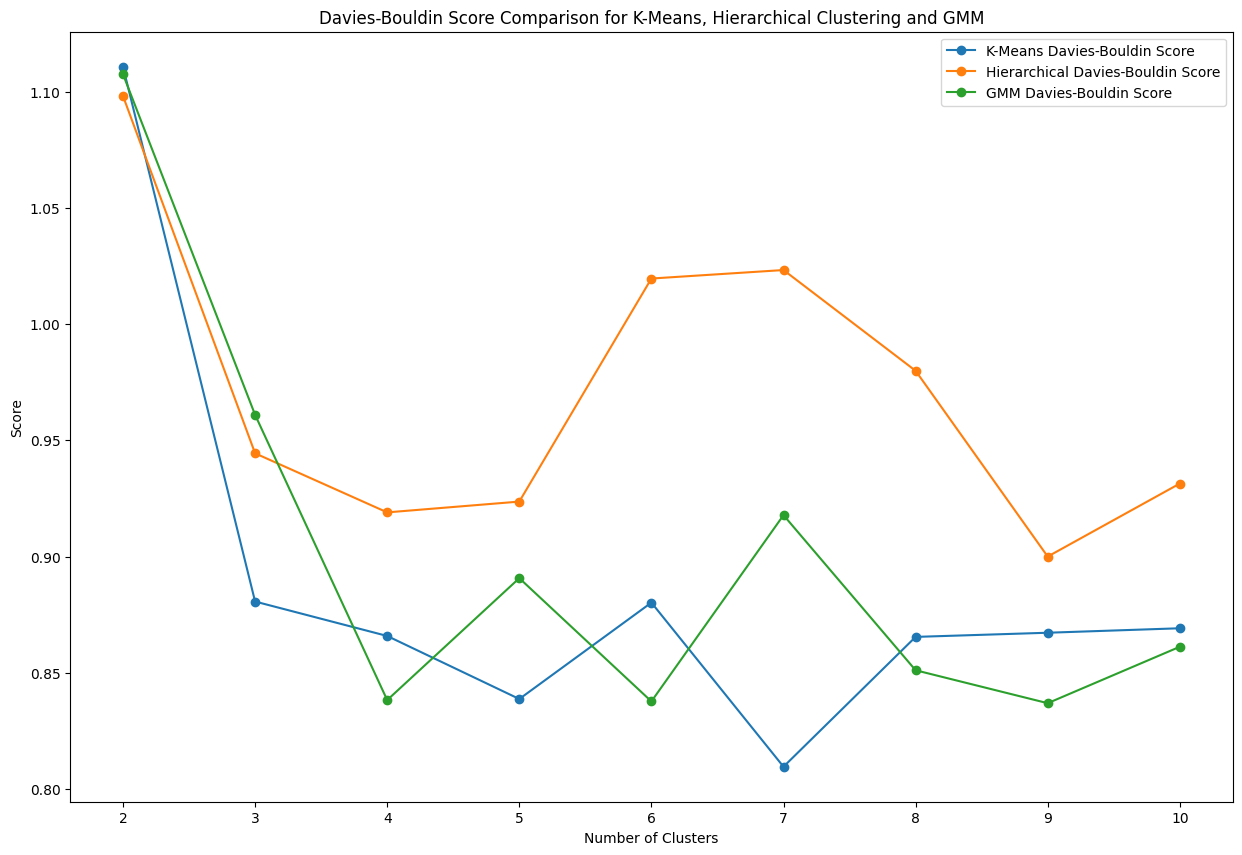

In [547]:
# compare davies bouldin scores plots of kmeans, hierarchical and gmm
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), kmeans_davies_bouldin_scores, marker='o', label='K-Means Davies-Bouldin Score')
plt.plot(range(2, 11), hierarchical_davies_bouldin_scores, marker='o', label='Hierarchical Davies-Bouldin Score')
plt.plot(range(2, 11), gmm_davies_bouldin_scores, marker='o', label='GMM Davies-Bouldin Score')
plt.title('Davies-Bouldin Score Comparison for K-Means, Hierarchical Clustering and GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

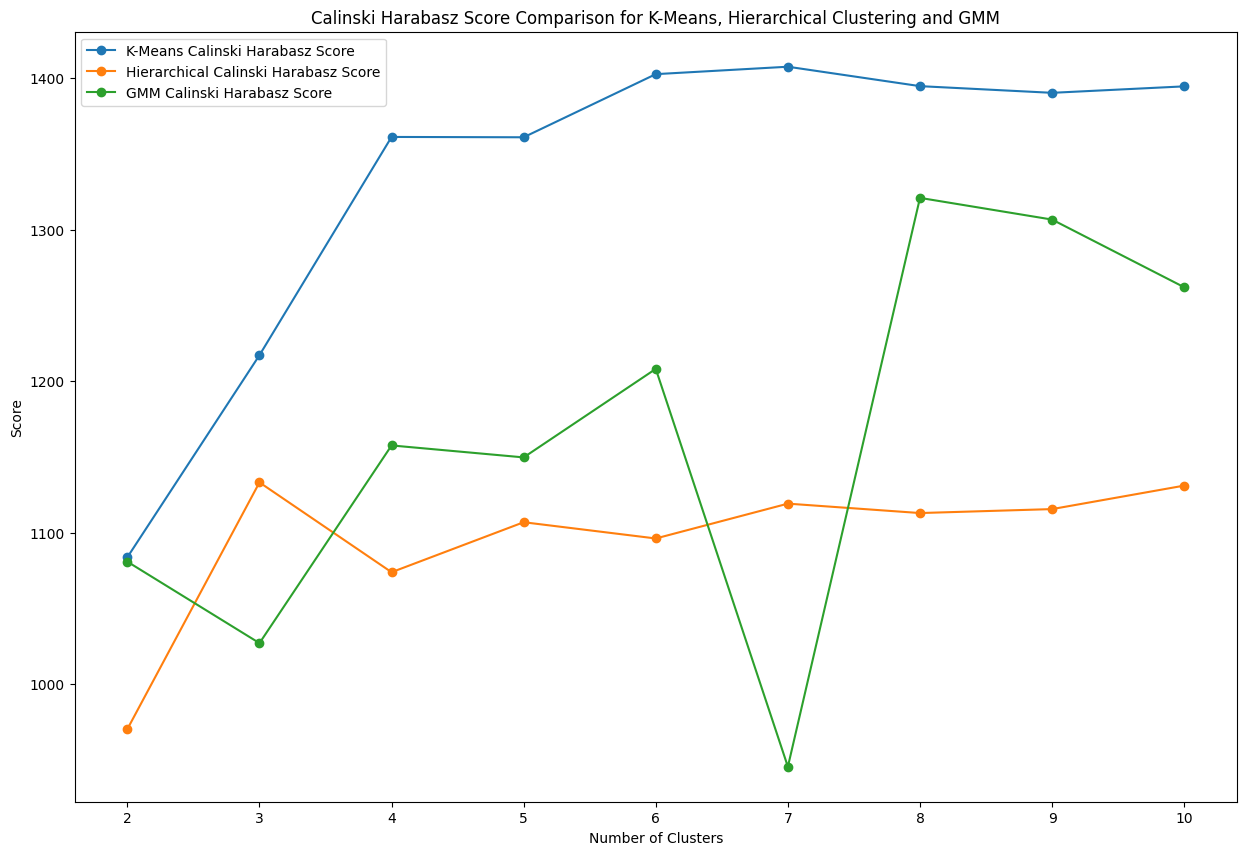

In [548]:
# compare calinski harabasz scores plots of kmeans, hierarchical and gmm
plt.figure(figsize=(15,10))
plt.plot(range(2, 11), kmeans_calinski_harabasz_scores, marker='o', label='K-Means Calinski Harabasz Score')
plt.plot(range(2, 11), hierarchical_calinski_harabasz_scores, marker='o', label='Hierarchical Calinski Harabasz Score')
plt.plot(range(2, 11), gmm_calinski_harabasz_scores, marker='o', label='GMM Calinski Harabasz Score')
plt.title('Calinski Harabasz Score Comparison for K-Means, Hierarchical Clustering and GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()